In [0]:
!git clone https://git.scc.kit.edu/uklpi/my-smart-data-analysis.git

Cloning into 'my-smart-data-analysis'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [0]:
!mv my-smart-data-analysis/* ./

In [0]:
import numpy as np
import pandas as pd
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

This dataset tells which of the users purchased/not purchased a particular product.

In [0]:
data = pd.read_csv("./data/Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [0]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [0]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# SVM

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The model is also known as an estimator.

First, we need to import GridSearchCV from the sklearn library, a machine learning library for python. The estimator parameter of GridSearchCV requires the model we are using for the hyper parameter tuning process. For this example, we are using the rbf kernel of the Support Vector Regression model(SVR). The param_grid parameter requires a list of parameters and the range of values for each parameter of the specified estimator. The most significant parameters required when working with the rbf kernel of the SVR model are c, gamma. A list of values to choose from should be given to each hyper parameter of the model. We can change these values and experiment more to see which value ranges give better performance. A cross validation process is performed in order to determine the hyper parameter value set which provides the best accuracy levels.

SVM
C: float, optional (default=1.0)
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel: string, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

gamma: {‘scale’, ‘auto’} or float, optional (default=’scale’)
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
if ‘auto’, uses 1 / n_features.


In [0]:
param_grid_svc = [{'C': [1, 2, 3, 4, 5, 10,100, 1000], 'kernel': ['linear'], },
              {'C': [1, 2, 3, 4, 5,10,100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}]
search_svm = GridSearchCV(SVC(random_state=1), param_grid_svc, scoring='accuracy', cv=10, n_jobs=-1)
search_svm = search_svm.fit(X_train, y_train)
best_score_svm = search_svm.best_score_
best_parameters_svm = search_svm.best_params_
scores_svm = search_svm.cv_results_
Data_svm = pd.DataFrame(scores_svm)
Data_svm
# Data_svm[['params', 'mean_test_score', 'mean_score_time', 'rank_test_score' ]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002909,0.000700,0.000581,0.000092,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.8125,0.75000,0.87500,0.87500,0.81250,0.78125,0.84375,0.96875,0.8125,0.87500,0.840625,0.058380,65
1,0.003137,0.000842,0.000688,0.000547,2,linear,NaN,"{'C': 2, 'kernel': 'linear'}",0.8125,0.75000,0.87500,0.87500,0.81250,0.75000,0.78125,0.96875,0.8125,0.87500,0.831250,0.064348,66
2,0.003079,0.000758,0.000495,0.000043,3,linear,NaN,"{'C': 3, 'kernel': 'linear'}",0.8125,0.75000,0.87500,0.87500,0.81250,0.75000,0.78125,0.96875,0.8125,0.87500,0.831250,0.064348,66
3,0.005213,0.002874,0.000508,0.000016,4,linear,NaN,"{'C': 4, 'kernel': 'linear'}",0.8125,0.75000,0.87500,0.87500,0.81250,0.75000,0.78125,0.96875,0.8125,0.87500,0.831250,0.064348,66
4,0.003672,0.001158,0.000491,0.000037,5,linear,NaN,"{'C': 5, 'kernel': 'linear'}",0.8125,0.75000,0.87500,0.87500,0.81250,0.75000,0.78125,0.96875,0.8125,0.87500,0.831250,0.064348,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.015669,0.004731,0.000619,0.000038,1000,rbf,0.4,"{'C': 1000, 'gamma': 0.4, 'kernel': 'rbf'}",0.8750,0.90625,0.96875,0.96875,0.93750,0.75000,0.87500,0.96875,0.8750,0.93750,0.906250,0.064043,60
68,0.014610,0.003019,0.000570,0.000031,1000,rbf,0.5,"{'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}",0.8750,0.90625,0.93750,0.93750,0.93750,0.78125,0.87500,0.96875,0.8750,0.93750,0.903125,0.051254,61
69,0.014399,0.003914,0.000603,0.000031,1000,rbf,0.6,"{'C': 1000, 'gamma': 0.6, 'kernel': 'rbf'}",0.8750,0.90625,0.93750,0.90625,0.90625,0.81250,0.87500,0.93750,0.8750,0.90625,0.893750,0.034799,64
70,0.018153,0.004295,0.000597,0.000032,1000,rbf,0.7,"{'C': 1000, 'gamma': 0.7, 'kernel': 'rbf'}",0.8750,0.90625,0.93750,0.93750,0.90625,0.81250,0.87500,0.96875,0.8750,0.90625,0.900000,0.041458,63


NOTE
cv_results(GridSearchCV)：
The key 'params' is used to store a list of parameter settings dicts for all the parameter candidates.

The mean_fit_time, std_fit_time, mean_score_time and std_score_time are all in seconds.

For multi-metric evaluation, the scores for all the scorers are available in the cv_results_ dict at the keys ending with that scorer’s name ('_<scorer_name>') instead of '_score' shown above. (‘split0_test_precision’, ‘mean_train_precision’ etc.)



In [0]:
best_parameters_svm

{'C': 3, 'gamma': 0.6, 'kernel': 'rbf'}

In [0]:
best_score_svm

0.93125

## Parallelization Speedups

In [0]:
import matplotlib
import matplotlib.pyplot as plt

import time

times = []
for n_jobs in range(1, 16):
  start_time = time.time()
  search_svm = GridSearchCV(SVC(random_state=1), param_grid_svc, scoring='accuracy', cv=10, n_jobs=n_jobs)
  search_svm = search_svm.fit(X_train, y_train)
  times.append(time.time() - start_time)
times

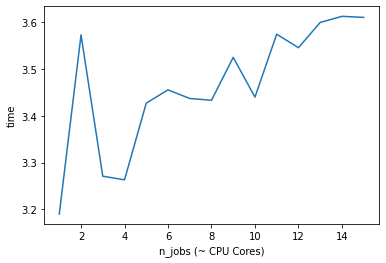

In [0]:
plt.plot(range(1, 16), times)
plt.ylabel('time')
plt.xlabel('n_jobs (~ CPU Cores)')
plt.title('', fontsize=12)
plt.show()

Interestingly, there are no speedups visible when using multiple jobs / cores. This is probably due to the shared colab environment where cpu resource management limits the overall cpu usage by one notebook.

# Random Forest

A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

n_estimators: The number of trees in the forest.

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
param_grid_rf = [{'n_estimators': [1,5,10,15,20], 'n_jobs': [1, -1]}]
search_rf = GridSearchCV(RandomForestClassifier(random_state = 1), param_grid_rf, scoring='accuracy', cv=10)
search_rf = search_rf.fit(X_train, y_train)
best_score_rf = search_rf.best_score_
best_parameters_rf = search_rf.best_params_
scores_rf = search_rf.cv_results_
Data_rf = pd.DataFrame(scores_rf)
Data_rf
# Data_rf[['param_n_estimators', 'mean_test_score', 'mean_score_time', 'rank_test_score']].to_csv("./rf.dat")
# Data_rf[['params', 'mean_test_score', 'mean_score_time', 'rank_test_score']].to_csv("./rf.dat")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002740,0.000973,0.000744,0.000175,1,1,"{'n_estimators': 1, 'n_jobs': 1}",0.84375,0.81250,0.84375,0.96875,0.93750,0.81250,0.87500,0.90625,0.875,0.90625,0.878125,0.049312,9
1,0.102577,0.208741,0.001121,0.000366,1,-1,"{'n_estimators': 1, 'n_jobs': -1}",0.84375,0.81250,0.84375,0.96875,0.93750,0.81250,0.87500,0.90625,0.875,0.90625,0.878125,0.049312,9
2,0.007233,0.000215,0.000922,0.000018,5,1,"{'n_estimators': 5, 'n_jobs': 1}",0.84375,0.87500,0.87500,1.00000,0.93750,0.90625,0.87500,0.93750,0.875,0.93750,0.906250,0.044194,3
3,0.017892,0.000600,0.102412,0.000383,5,-1,"{'n_estimators': 5, 'n_jobs': -1}",0.84375,0.87500,0.87500,1.00000,0.93750,0.90625,0.87500,0.93750,0.875,0.93750,0.906250,0.044194,3
4,0.014265,0.001186,0.001394,0.000224,10,1,"{'n_estimators': 10, 'n_jobs': 1}",0.81250,0.84375,0.87500,1.00000,0.96875,0.81250,0.90625,1.00000,0.875,0.93750,0.903125,0.067676,5
5,0.030323,0.000753,0.102359,0.000088,10,-1,"{'n_estimators': 10, 'n_jobs': -1}",0.81250,0.84375,0.87500,1.00000,0.96875,0.81250,0.90625,1.00000,0.875,0.93750,0.903125,0.067676,5
6,0.020099,0.000316,0.001677,0.000026,15,1,"{'n_estimators': 15, 'n_jobs': 1}",0.84375,0.84375,0.90625,1.00000,0.96875,0.87500,0.90625,1.00000,0.875,0.93750,0.915625,0.055989,1
7,0.041749,0.000968,0.102358,0.000155,15,-1,"{'n_estimators': 15, 'n_jobs': -1}",0.84375,0.84375,0.90625,1.00000,0.96875,0.87500,0.90625,1.00000,0.875,0.93750,0.915625,0.055989,1
8,0.026406,0.000309,0.002047,0.000052,20,1,"{'n_estimators': 20, 'n_jobs': 1}",0.84375,0.81250,0.87500,0.96875,0.96875,0.87500,0.87500,1.00000,0.875,0.93750,0.903125,0.058380,5
9,0.047965,0.002149,0.102377,0.000103,20,-1,"{'n_estimators': 20, 'n_jobs': -1}",0.84375,0.81250,0.87500,0.96875,0.96875,0.87500,0.87500,1.00000,0.875,0.93750,0.903125,0.058380,5


Zielmetrik in Abhängigkeit von einem Hyperparameter

Focus on 'param_n_estimators' and 'mean_test_score'.

In [0]:
plotdata = Data_rf[['param_n_estimators','param_n_jobs', 'mean_test_score', 'rank_test_score']]
plotdata

,param_n_estimators,param_n_jobs,mean_test_score,rank_test_score
0,1,1,0.878125,9
1,1,-1,0.878125,9
2,5,1,0.906250,3
3,5,-1,0.906250,3
4,10,1,0.903125,5
5,10,-1,0.903125,5
6,15,1,0.915625,1
7,15,-1,0.915625,1
8,20,1,0.903125,5
9,20,-1,0.903125,5


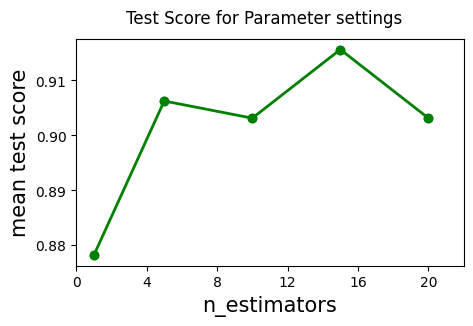

In [0]:
x=plotdata['param_n_estimators']
y=plotdata['mean_test_score']


fig = plt.figure(figsize=(5,3),dpi=100)
fig.suptitle('Test Score for Parameter settings', fontsize=12)
ax=fig.add_subplot(1,1,1)
ax.plot(x, y, 'go-', linewidth = 2)

#ax.legend(loc='center right',fontsize=15, numpoints=1, framealpha=0.5)
ax.set_xlabel('n_estimators', fontsize=15)
ax.set_ylabel('mean test score', fontsize=15)
ax.set_xlim(0,22)
ax.set_xticks(np.arange(0,22,4))

scoring='accuracy': similar with 
sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
Accuracy classification score.
In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [0]:
best_parameters_rf

{'n_estimators': 15, 'n_jobs': 1}

In [0]:
best_score_rf

0.915625

# Logistic Regression



1.   C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
2.   penalty{‘l1’, ‘l2’}: Used to specify the norm used in the penalization. 




In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
param_grid_lr = [{"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}]
#numpy.logspace(start, stop, num), base = 10
search_lr = GridSearchCV(LogisticRegression(solver='liblinear', random_state=1), param_grid_lr, scoring='accuracy', cv=10, n_jobs=-1)
search_lr = search_lr.fit(X_train, y_train)
best_score_lr = search_lr.best_score_
best_parameters_lr = search_lr.best_params_
scores_lr = search_lr.cv_results_
Data_lr = pd.DataFrame(scores_lr)
# Data_lr
plotdata = Data_lr[['params', 'param_C' , 'param_penalty', 'mean_test_score', 'mean_score_time']]
plotdata

,params,param_C,param_penalty,mean_test_score,mean_score_time
0,"{'C': 0.001, 'penalty': 'l1'}",0.001,l1,0.653125,0.000439
1,"{'C': 0.001, 'penalty': 'l2'}",0.001,l2,0.828125,0.001033
2,"{'C': 0.01, 'penalty': 'l1'}",0.01,l1,0.653125,0.001018
3,"{'C': 0.01, 'penalty': 'l2'}",0.01,l2,0.834375,0.000426
4,"{'C': 0.1, 'penalty': 'l1'}",0.1,l1,0.853125,0.000453
5,"{'C': 0.1, 'penalty': 'l2'}",0.1,l2,0.840625,0.000899
6,"{'C': 1.0, 'penalty': 'l1'}",1,l1,0.843750,0.000393
7,"{'C': 1.0, 'penalty': 'l2'}",1,l2,0.840625,0.000421
8,"{'C': 10.0, 'penalty': 'l1'}",10,l1,0.840625,0.000427
9,"{'C': 10.0, 'penalty': 'l2'}",10,l2,0.840625,0.000413


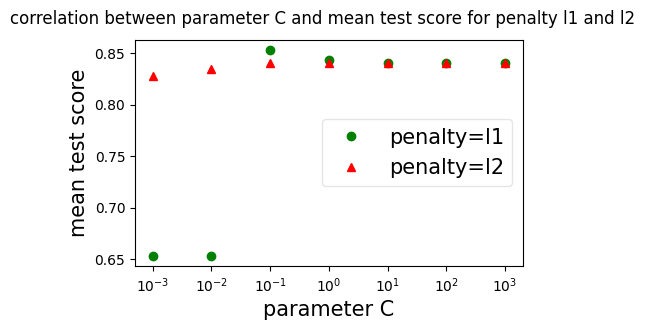

In [0]:
x1=plotdata['param_C'][plotdata['param_penalty']=='l1']
y1=plotdata['mean_test_score'][plotdata['param_penalty']=='l1']

x2=plotdata['param_C'][plotdata['param_penalty']=='l2']
y2=plotdata['mean_test_score'][plotdata['param_penalty']=='l2']


fig = plt.figure(figsize=(5,3),dpi=100)
fig.suptitle('correlation between parameter C and mean test score for penalty l1 and l2', fontsize=12)
ax=fig.add_subplot(1,1,1)
ax.plot(x1, y1, 'go', label='penalty=l1', linewidth = 2)
ax.plot(x2, y2, 'r^', label='penalty=l2', linewidth = 2)

ax.legend(loc='center right',fontsize=15, numpoints=1, framealpha=0.5)
ax.set_xlabel('parameter C', fontsize=15)
ax.set_ylabel('mean test score', fontsize=15)
ax.set_xscale('log')#. np.logspace(-3,3,7)
ax.get_xaxis().set_tick_params(which='minor',size=0)


In [0]:
best_parameters_rf

{'n_estimators': 15, 'n_jobs': 1}

In [0]:
best_score_lr

0.853125

#Comparing all scores 

In [0]:
model = ['SVM','Random Forest','Logistic Regression']
best_parameters = [best_parameters_svm, best_parameters_rf, best_parameters_lr]
best_score = [best_score_svm, best_score_rf, best_score_lr]
pd.DataFrame(np.column_stack([model,best_parameters, best_score ]),columns=['Model', 'best_parameters', 'best_score'])

,Model,best_parameters,best_score
0,SVM,"{'C': 3, 'gamma': 0.6, 'kernel': 'rbf'}",0.93125
1,Random Forest,"{'n_estimators': 15, 'n_jobs': 1}",0.915625
2,Logistic Regression,"{'C': 0.1, 'penalty': 'l1'}",0.853125


We see that the best result could be achieved by the SVM model with the parameters found by the grid search.

#Conclusion

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions. Here I used Grid-Search to build a classification model on Social network ads dataset to search the best model and hyperparameters. 
A model hyperparameter is a characteristic of a model that is external to the model and whose value cannot be estimated from data. The value of the hyperparameter has to be set before the learning process begins. For example, c in Support Vector Machines, n estimators in Random Forest, c in Logistic Regression, the number of hidden layers in Neural Networks. If we work with ML, it's important and hard to stipulate values for hyper parameters. There are libraries that have been implemented, such as GridSearchCV of the sklearn library, in order to automate this process and make life a little bit easier for ML enthusiasts.